# **連接雲端**

In [1]:
#若要用 google colab才用的程式碼(用Jupyter notebook就不需要)

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


# **觀察原始資料**

In [1]:
# 讀檔
# 在Jupyter notebook下放預測目錄就可以不用路徑
# 若不放預設目錄下怕找不到,就要自己改成完整路徑

import pandas as pd
#df1=pd.read_csv('/content/gdrive/MyDrive/111-進階決策統計/P2P預測-學生/資料檔/LoanStats_2016_2017_train_1210.csv')
#df1=pd.read_csv('LoanStats_2016_2017_train_1210.csv')
#df1 = pd.read_excel('LC_2016_2017_700obs_39VAR_Nov212022.xls', nrows=700)
df1=pd.read_csv('LC_2016_2017_700obs_39VAR_Nov212022.csv')
df1.head(10)

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
0,1,76000.0,28.83,2,1,0,2,2,3,25000,...,0.0,0,12,12,16,NaN,3,81.8,0,94435
1,2,37000.0,15.57,0,0,2,2,1,2,6000,...,6.0,0,5,6,7,0.0,2,25.0,0,27385
2,3,39000.0,6.09,1,0,1,0,1,3,1500,...,2.0,1,2,5,5,0.0,2,0.0,0,125293
3,4,69000.0,23.79,0,0,1,4,1,3,16000,...,12.0,0,2,2,3,0.0,0,100.0,0,231425
4,5,30000.0,30.80,3,0,2,0,1,3,1500,...,3.0,0,7,9,22,0.0,5,33.3,1,40378
5,6,68000.0,17.49,2,1,1,2,2,3,29900,...,0.0,0,7,11,32,0.0,4,100.0,1,596136
6,7,13500.0,13.51,0,0,2,0,1,3,1450,...,19.0,0,1,2,2,0.0,3,0.0,0,33321
7,8,66500.0,20.73,0,1,2,3,1,2,6000,...,0.0,0,6,18,21,0.0,3,6.7,0,73370
8,9,40000.0,8.13,0,0,1,2,1,3,8000,...,17.0,0,3,4,12,0.0,0,100.0,0,184600
9,10,27900.0,26.13,1,0,2,2,1,3,6000,...,5.0,0,8,10,13,0.0,3,25.0,0,39125


In [2]:
# 基本統計量
df1.describe()

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,641.000000,700.000000,700.000000,700.000000,700.000000,669.000000,700.000000,693.000000,700.000000,7.000000e+02
mean,350.50000,74462.573343,19.154229,0.625714,0.292857,1.285714,2.857143,1.842857,2.750000,14433.928571,...,5.867395,0.560000,5.384286,8.044286,13.967143,0.001495,2.498571,42.333045,0.147143,1.612904e+05
std,202.21688,50666.409455,9.225827,0.893417,0.455399,0.664722,1.431165,0.868058,1.195635,9004.799265,...,5.598232,1.313776,3.235096,4.506493,7.712859,0.038662,2.109654,36.590688,0.407098,1.579422e+05
min,1.00000,7100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.400000e+03
25%,175.75000,46875.000000,12.450000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,7200.000000,...,1.000000,0.000000,3.000000,5.000000,8.000000,0.000000,1.000000,0.000000,0.000000,4.658750e+04
50%,350.50000,65000.000000,18.005000,0.000000,0.000000,1.000000,3.000000,2.000000,3.000000,12000.000000,...,4.000000,0.000000,5.000000,7.000000,12.000000,0.000000,2.000000,33.300000,0.000000,9.922100e+04
75%,525.25000,90000.000000,25.480000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,20000.000000,...,9.000000,1.000000,7.000000,10.000000,18.000000,0.000000,4.000000,75.000000,0.000000,2.286582e+05
max,700.00000,800000.000000,52.020000,4.000000,1.000000,2.000000,10.000000,3.000000,7.000000,40000.000000,...,23.000000,13.000000,24.000000,34.000000,50.000000,1.000000,17.000000,100.000000,3.000000,1.061525e+06


# **資料預處理**

In [3]:
# 檢查各個欄位缺失值的數量
#df1.isna()
df1.isna().sum()

id                          0
annual_inc                  0
dti                         0
inq_last_6mths              0
loan_status                 0
home_ownership              0
purpose                     0
verification_status         0
grade                       0
funded_amnt                 0
installment                 0
delinq_2yrs                 0
mths_since_last_delinq    330
open_acc                    0
pub_rec                     0
revol_bal                   0
acc_now_delinq              0
tot_coll_amt                0
open_acc_6m                 0
open_act_il                 0
open_rv_12m                 0
max_bal_bc                  0
all_util                    1
inq_fi                      0
bc_open_to_buy              7
bc_util                     7
delinq_amnt                 0
mo_sin_old_rev_tl_op        0
mo_sin_rcnt_rev_tl_op       0
mort_acc                    0
mths_since_recent_inq      59
num_accts_ever_120_pd       0
num_actv_rev_tl             0
num_op_rev

In [4]:
# 缺失值用平均數去補
df2 = df1.fillna(df1.mean())

In [5]:
# 檢查補完值後是否還存在缺失值
df2.isna().sum()

id                        0
annual_inc                0
dti                       0
inq_last_6mths            0
loan_status               0
home_ownership            0
purpose                   0
verification_status       0
grade                     0
funded_amnt               0
installment               0
delinq_2yrs               0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
acc_now_delinq            0
tot_coll_amt              0
open_acc_6m               0
open_act_il               0
open_rv_12m               0
max_bal_bc                0
all_util                  0
inq_fi                    0
bc_open_to_buy            0
bc_util                   0
delinq_amnt               0
mo_sin_old_rev_tl_op      0
mo_sin_rcnt_rev_tl_op     0
mort_acc                  0
mths_since_recent_inq     0
num_accts_ever_120_pd     0
num_actv_rev_tl           0
num_op_rev_tl             0
num_rev_accts             0
num_tl_120dpd_2m    

In [6]:
# 類別型變數做虛擬變數
df2 = pd.get_dummies(df2, columns=['grade','home_ownership','pub_rec_bankruptcies','purpose','verification_status'], drop_first = True)
df2

,id,annual_inc,dti,inq_last_6mths,loan_status,funded_amnt,installment,delinq_2yrs,mths_since_last_delinq,open_acc,...,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_9,purpose_10,verification_status_2,verification_status_3
0,1,76000.0,28.83,2,1,25000,830.24,0,34.472973,16,...,True,False,False,False,False,False,False,False,True,False
1,2,37000.0,15.57,0,0,6000,195.73,0,34.472973,8,...,True,False,False,False,False,False,False,False,False,False
2,3,39000.0,6.09,1,0,1500,50.54,0,60.000000,8,...,False,False,False,False,False,False,False,False,False,False
3,4,69000.0,23.79,0,0,16000,376.12,0,80.000000,5,...,False,False,True,False,False,False,False,False,False,False
4,5,30000.0,30.80,3,0,1500,50.54,0,34.472973,17,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,29500.0,23.88,2,1,4800,183.24,0,34.472973,14,...,True,False,False,False,False,False,False,False,False,True
696,697,100000.0,9.00,1,0,24000,722.76,0,34.472973,7,...,False,True,False,False,False,False,False,False,True,False
697,698,40000.0,21.48,1,0,4300,149.72,0,34.472973,8,...,False,True,False,False,False,False,False,False,False,False
698,699,150000.0,4.46,1,1,6000,191.25,2,1.000000,9,...,False,True,False,False,False,False,False,False,True,False


# **建立模型**

In [7]:
# 預測變數: x
# 目標變數: y

#特別指派只嘗試某些變數組合
feature_cols = ['installment','revol_bal','bc_util','home_ownership_1']
x = df2[feature_cols]

#一次丟全部變數
#x= df2.drop(['loan_status','id'],axis=1)
y= df2['loan_status']

x

,installment,revol_bal,bc_util,home_ownership_1
0,830.24,20879,93.0,False
1,195.73,5221,56.8,False
2,50.54,3476,23.2,True
3,376.12,6909,95.1,True
4,50.54,4276,58.7,False
...,...,...,...,...
695,183.24,25984,72.7,False
696,722.76,5973,15.8,False
697,149.72,2773,51.4,False
698,191.25,3402,26.9,True


In [8]:
# 訓練集(train): 測試集(test) = 0.75:0.25
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
# 建立隨機森林模型
from sklearn.ensemble import RandomForestClassifier
# 設置決策樹的結構(可自行調整參數)
clf = RandomForestClassifier(n_estimators=40,max_depth=3,random_state=10)
# 用訓練集訓練模型
clf.fit(x_train,y_train)
# 訓練集的準確度
print(clf.score(x_train,y_train))

0.7504761904761905


# **觀察重要變數**

In [10]:
# 模型中所有變數的重要性
a=clf.feature_importances_
# 模型中所有的變數
#b=clf.feature_names_in_
#b=clf.feature_names
b=x.keys().tolist()

imp=[]
name=[]
# 篩選出重要性大於0的變數
for i in range(len(a)):
    if a[i]>0:
        imp.append(a[i])
        name.append(b[i])

fe=pd.DataFrame(imp,name)
fe.columns=["feature_importance"]
# 將重要性由大排到小
fe=fe.sort_values("feature_importance",ascending=False)
fe


,feature_importance
installment,0.421498
bc_util,0.324365
revol_bal,0.229763
home_ownership_1,0.024375


Text(0, 0.5, 'Feature Importance')

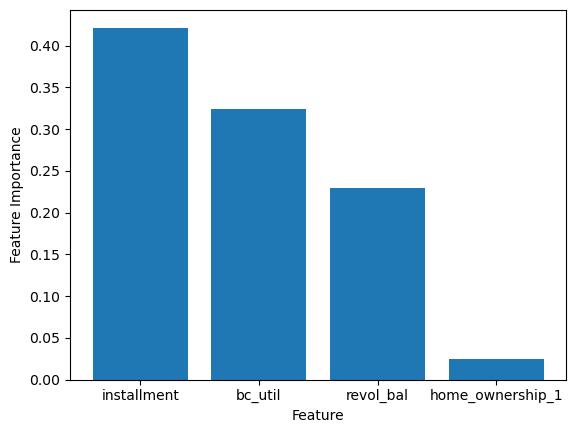

In [12]:
# 變數重要性
# 圖表化
import matplotlib as mpl
import matplotlib.pyplot as plt

#畫長條圖
#plt.style.use('ggplot')
plt.bar(fe.index, fe['feature_importance'])
plt.xlabel('Feature') #x軸名稱
plt.ylabel('Feature Importance') #x軸名稱

# **預測測試集的 錯誤貸放率 與 放款量**

In [18]:
# 預測 測試集
y_pred = clf.predict(x_test)
# 混淆矩陣
from sklearn.metrics import accuracy_score, confusion_matrix
#print('Accuracy:', accuracy_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test)

In [19]:
# 計算 錯誤貸放率
matrix = confusion_matrix(y_test, y_pred)
print("混淆矩陣:")
print(matrix)
wrong_rate=matrix[1][0]/(matrix[1][0]+matrix[0][0])
print("錯誤貸放率= ", wrong_rate)
num_loan_prop=(matrix[1][0]+matrix[0][0])/(matrix[1][0]+matrix[0][0]+matrix[0][1]+matrix[1][1])
print("放款率= ", num_loan_prop)

混淆矩陣:
[[106   7]
 [ 58   4]]
錯誤貸放率=  0.35365853658536583
放款率=  0.9371428571428572
